# **Project Name- Ford GoBike Sharing Data Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - BABLI NIGAM

# **Project Summary -**

The Ford GoBike Analysis project focuses on understanding the usage patterns of bike rentals in the San Francisco Bay Area. The project leverages data on customer and subscriber usage, exploring factors such as user type (subscriber vs. customer), rental duration, frequency of use, gender demographics, and day-of-week demand. By analyzing these trends, the aim is to uncover actionable insights that can enhance service offerings, optimize business operations, and drive growth. Key findings will inform strategies for targeting specific user segments, improving customer engagement, and maximizing the efficiency of the bike-sharing service.

# **GitHub Link -**

# **Problem Statement**

The Ford GoBike dataset provides detailed information on bike-sharing usage patterns in San Francisco, including key data points such as trip start and end times, duration, station locations (with IDs), member birth year, gender, and user type. However, the factors driving bike usage, emerging trends, and potential insights for improving the service have not been fully explored. The objective of this project is to conduct a comprehensive Exploratory Data Analysis (EDA) on the dataset to uncover usage patterns, understand user behavior, and identify actionable insights that can enhance the overall service experience and business operations.

#### **Define Your Business Objective?**

The primary business objective of this **Exploratory Data Analysis (EDA)** is to provide actionable insights that can help **Ford GoBike** optimize its service offerings and drive business growth. By analyzing the dataset, the goal is to:

**Identify peak usage times and locations** to optimize bike distribution and station placement, ensuring better availability and convenience for users.

**Understand user demographics and behaviors** to tailor marketing strategies and improve customer engagement, increasing retention rates and user satisfaction.

**Explore patterns in trip duration, weather conditions, and trip types** to optimize fleet management and improve operational efficiency, ensuring that resources are allocated effectively.

**Discover potential bottlenecks or underutilized areas** in the service, allowing for targeted improvements that will boost customer satisfaction and profitability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\BABLI\labmentix projects\201801-fordgobike-tripdata.csv~\201801-fordgobike-tripdata.csv")

### Dataset First View

In [3]:
# Dataset First Look
# Check the top 5 rows of the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(94802, 16)

### Dataset Information

In [5]:
# Dataset Info
# General info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Checking for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64

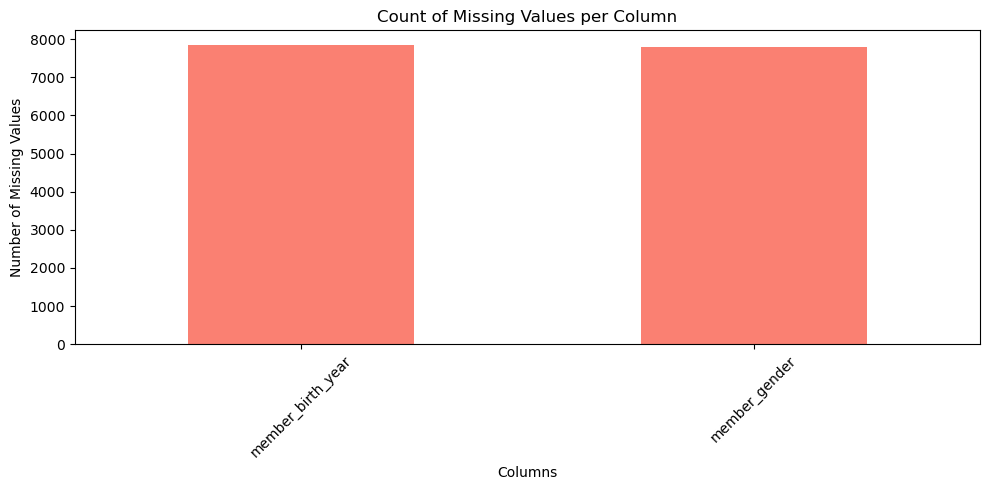

In [8]:
# Total missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Bar plot
plt.figure(figsize=(10, 5))
missing_values.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What did you know about your dataset?

**The dataset contains trip data for a continuous period of 31 days, spanning the entire month of January 2018.**

The columns are:
- trip duration in seconds
- start time and date
- end time and date
- start station ID
- start station name
- start station latitude
- start station longitude
- end station ID
- end station name
- end station latitude
- end station longitude
- bike ID
- user type(Subscriber or Customer)
- member Year of Birth
- member gender
- bike_share_for_all_trip

**Subscriber** - member

**Customer** - casual

There are **94802** records and **16** columns in the dataset.

The columns may need some cleaning as evidenced by
- missing values in columns such as **member_birth_year, member_gender**.
- `start_time` and `end_time` datatypes.

In [9]:
# Find minimum and maximum start time
m = df['start_time'].min()
n = df['start_time'].max()

# Print them nicely
print(f"Start Date: {m}")
print(f"End Date and Time: {n}")

Start Date: 2018-01-01 00:01:53.8470
End Date and Time: 2018-01-31 23:53:53.6320


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns.tolist()

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [11]:
# Dataset Describe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `duration_sec`            | Trip duration in seconds (key for identifying short vs long trips).         |
| `start_time`, `end_time`  | Timestamp of trip start and end (used for seasonal, hourly, and weekday trends). |
| `start_station_id`, `end_station_id` | Unique identifiers of start and end stations.                |
| `start_station_name`, `end_station_name` | Names of start and end stations (great for mapping popular routes). |
| `start_station_latitude`, `start_station_longitude` | GPS coordinates for start locations.       |
| `end_station_latitude`, `end_station_longitude`     | GPS coordinates for end locations.         |
| `bike_id`                 | Unique identifier for each bike (can be used to analyze bike usage frequency). |
| `user_type`               | Either **Subscriber** or **Customer**. Subscribers are regular users.       |
| `member_birth_year`       | Birth year of the user (used to calculate age and understand demographics). |
| `member_gender`           | Gender of the user (can be used to study usage trends across genders).     |
| `bike_share_for_all_trip` | Indicates whether the user opted for bike sharing for all trips (Yes/No).  |

### Check Unique Values for each variable.

In [12]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [13]:
# Check Unique Values for each variable.
print('Unique Values in dataset:\n')
print(df.nunique())

Unique Values in dataset:

duration_sec                4512
start_time                 94801
end_time                   94797
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
df['age'] = 2018 - df['member_birth_year']

In [15]:
# Convert time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create trip duration in minutes
df['trip_duration_min'] = df['duration_sec'] / 60

# Extract hour and weekday from start_time
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()

In [16]:
print(df['start_time'].head(10))
print("Start Date:", df['start_time'].min())
print("End Date:", df['start_time'].max())

0   2018-01-31 22:52:35.239
1   2018-01-31 16:13:34.351
2   2018-01-31 14:23:55.889
3   2018-01-31 14:53:23.562
4   2018-01-31 19:52:24.667
5   2018-01-31 22:58:44.867
6   2018-01-31 23:53:53.632
7   2018-01-31 23:52:09.903
8   2018-01-31 23:34:56.004
9   2018-01-31 23:34:14.027
Name: start_time, dtype: datetime64[ns]
Start Date: 2018-01-01 00:01:53.847000
End Date: 2018-01-31 23:53:53.632000


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: Distribution of Trip Duration (Minutes)

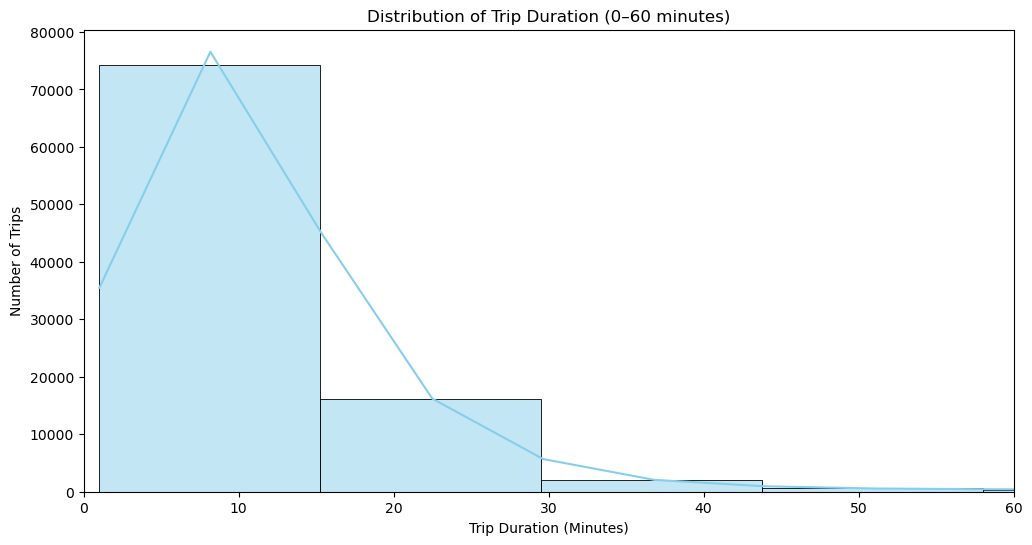

In [17]:
# Plotting distribution of trip duration in minutes

plt.figure(figsize=(12,6))
sns.histplot(df['trip_duration_min'], bins=100, kde=True, color='skyblue')
plt.xlim(0, 60)  # limit to 60 minutes to remove extreme outliers
plt.title('Distribution of Trip Duration (0–60 minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Number of Trips')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Histogram because it shows how trip durations are distributed across the dataset.
Since trip duration is a continuous numerical variable, a histogram is the best choice to observe concentration, spread, and outliers clearly.

##### 2. What is/are the insight(s) found from the chart?

Most trips are short, around 5 to 20 minutes long.
Very few trips are longer than 30 minutes.
There are extreme outliers (very long trips) but focusing on 0–60 minutes captures the major behavior of users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:

The company can design special offers or promotions for trips around 15–20 minutes, since that's the most common usage.

Pricing models (like per-minute charge) can be optimized based on popular trip durations.

More bikes can be allocated for short trips around office areas and metro stations where quick rides are common.

**No Negative Growth identified from this insight — it's all positive because understanding user behavior allows better operational and marketing decisions.

#### Chart - 2 Number of Trips by User Type (Subscriber vs Customer)

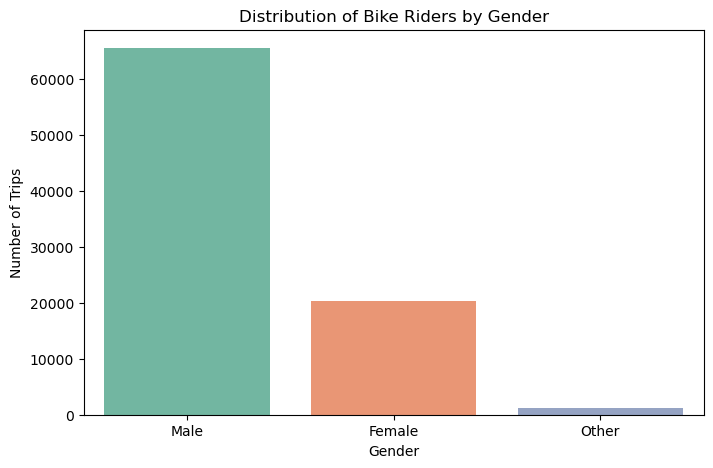

In [18]:
# Plotting number of trips by user type

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='member_gender', palette='Set2')
plt.title('Distribution of Bike Riders by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

##### 1. Why did you pick the specific chart?

I selected a Count Plot because user_type is a categorical variable (Subscriber / Customer).
Count plots are best suited to visualize frequencies of different categories clearly.

##### 2. What is/are the insight(s) found from the chart?

A majority of the trips are made by Subscribers compared to Customers.

Subscribers dominate the bike-sharing service, indicating regular and loyal usage patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:
Focus marketing campaigns and retention strategies more on Subscribers since they are the main customer base.
Loyalty programs or monthly/yearly plans can be offered to retain Subscribers longer.
Efforts can also be made to convert Customers into Subscribers with attractive offers.

**No major negative growth identified, but if customer conversion isn't improved, growth saturation among only existing subscribers might happen — highlighting the need to attract new casual users too.

#### Chart - 3 Gender Distribution of Bike Riders

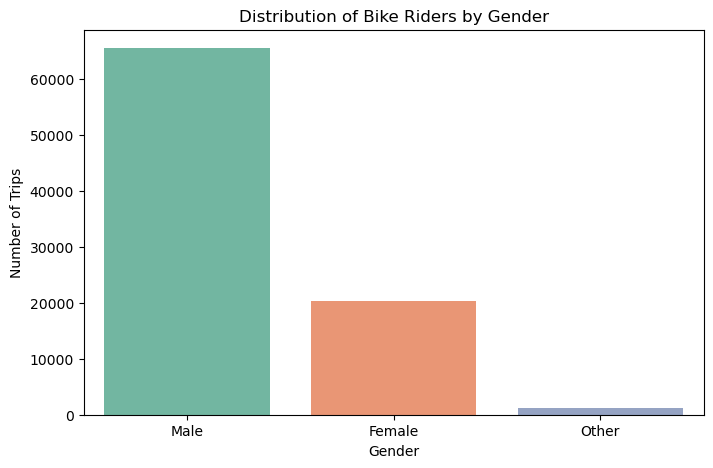

In [19]:
# Chart - 3 visualization code
# Plotting gender distribution of users

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='member_gender', palette='Set2')
plt.title('Distribution of Bike Riders by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Count Plot because member_gender is a categorical variable (Male, Female, Other, Unknown).
Count plots are ideal to visualize and compare how many trips are made by each gender group.

##### 2. What is/are the insight(s) found from the chart?

Male riders are the majority users of the Ford GoBike service.

Female riders make up a smaller portion of the total rides.

Other and Unknown genders form a very small group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:

The company can target female customers by promoting women-specific safety campaigns, discounts, or "Women’s Ride Days" to increase participation.

Promoting inclusivity and safety might attract Other/Unknown gender groups as well, expanding the user base.

**Negative growth risk:

If the company ignores the low female participation, they could miss an opportunity to grow their customer base significantly among women riders.

#### Chart - 4 Trips by Day of the Week

In [20]:
print(df['start_day'].value_counts())

start_day
Tuesday      20298
Wednesday    18375
Thursday     14058
Friday       13728
Monday       12638
Saturday      8691
Sunday        7014
Name: count, dtype: int64


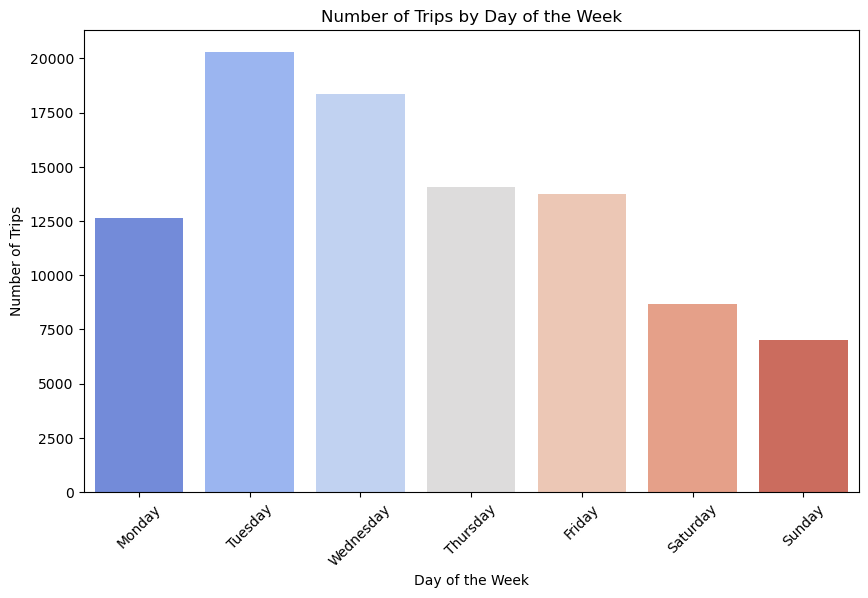

In [21]:
# Chart - 4 visualization code
# Plotting number of trips per day of the week
df['start_day'] = df['start_time'].dt.day_name()

plt.figure(figsize=(10,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='start_day', order=order, palette='coolwarm')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Count Plot because start_day is a categorical variable (Monday–Sunday).
This plot clearly shows on which days of the week the service is most and least used.

##### 2. What is/are the insight(s) found from the chart?

The highest number of trips happens on weekdays (Monday to Friday).

Weekends (Saturday and Sunday) see a drop in bike usage.

Thursday and Friday are especially busy compared to other days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:

Ford GoBike can focus more bike availability and maintenance during weekdays to meet higher demand.

Weekend offers/promotions can be introduced to increase weekend usage.

**Negative Growth Risk:

If enough bikes are not available on busy weekdays, it could negatively impact user satisfaction and cause loss of loyal subscribers.
Thus, efficient planning is crucial.

#### Chart - 5 Trips by Start Hour of the Day

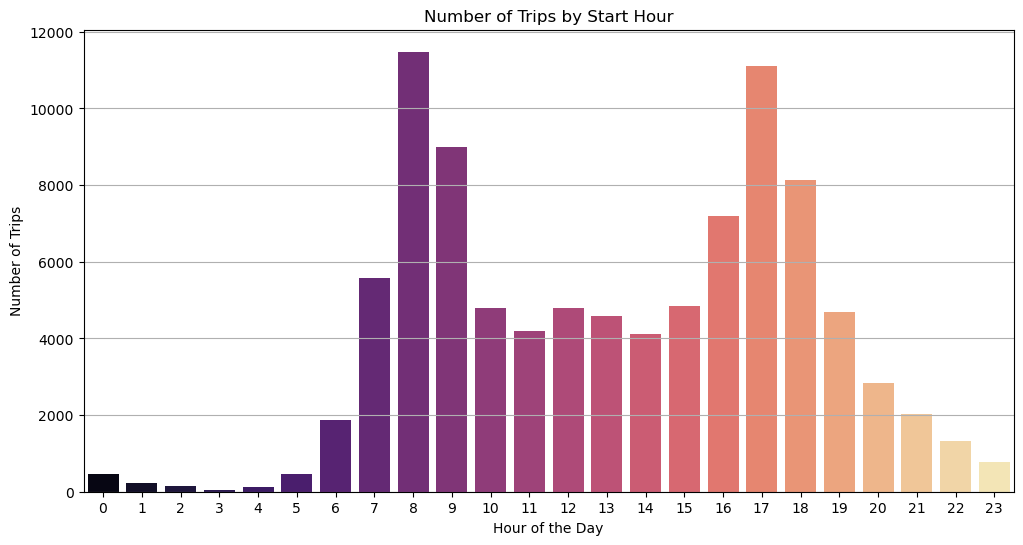

In [22]:
# Chart - 5 visualization code
# Plotting number of trips by start hour of the day

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='start_hour', palette='magma')
plt.title('Number of Trips by Start Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Count Plot because start_hour is a numerical but discrete (0–23 hours) variable.
This helps visualize at which times of the day bike rides are most common.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:

More bikes can be reallocated and serviced before peak commuting hours to meet high demand.
Special weekday "Commuter Plans" can be promoted targeting morning and evening commuters.

**Negative Growth Risk:
If bike availability is low during peak times, customer dissatisfaction and churn could increase.

#### Chart - 6 Relationship between Age and Trip Duration

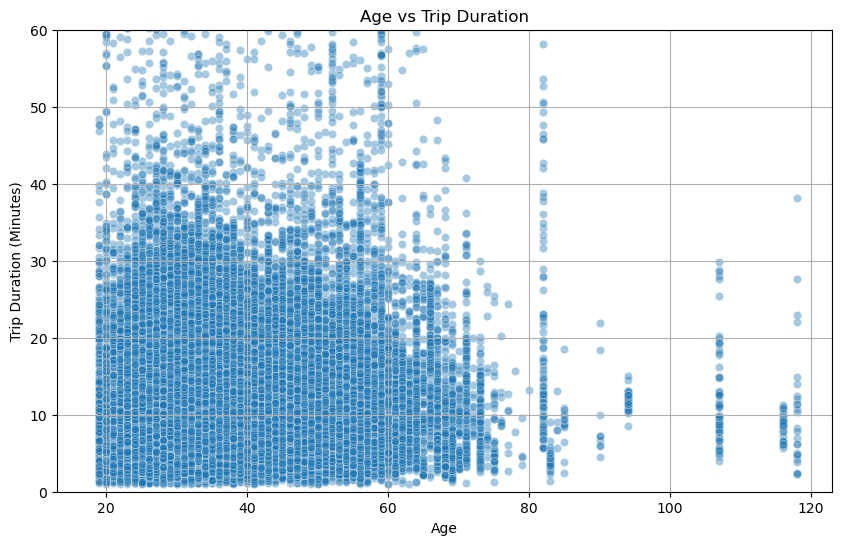

In [23]:
# Chart - 6 visualization code
# Scatter plot to show relationship between Age and Trip Duration

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='trip_duration_min', alpha=0.4)
plt.title('Age vs Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration (Minutes)')
plt.ylim(0, 60)  # focus on trips less than 60 minutes
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Scatter Plot because it’s the best visualization to explore the relationship between two continuous numerical variables:

Age of rider

Trip Duration in minutes

Scatter plots easily show clusters, trends, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Younger riders (around 20–35 years) are the most active users and have trip durations mainly under 30 minutes.

Riders above 50 years generally take shorter trips.

There are very few users aged above 65.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:

Marketing campaigns (special discounts or loyalty programs) can be targeted towards younger demographics (20–35 years).

For older users (above 50 years), health-focused campaigns (like "Stay Active Rides") can be introduced to increase usage.

**Negative Growth Risk:

If Ford GoBike focuses only on young users and ignores older demographics, they might miss an opportunity to expand the customer base into an aging population who could still enjoy short leisure rides.

#### Chart - 7 Trip Duration by User Type (Subscriber vs Customer)

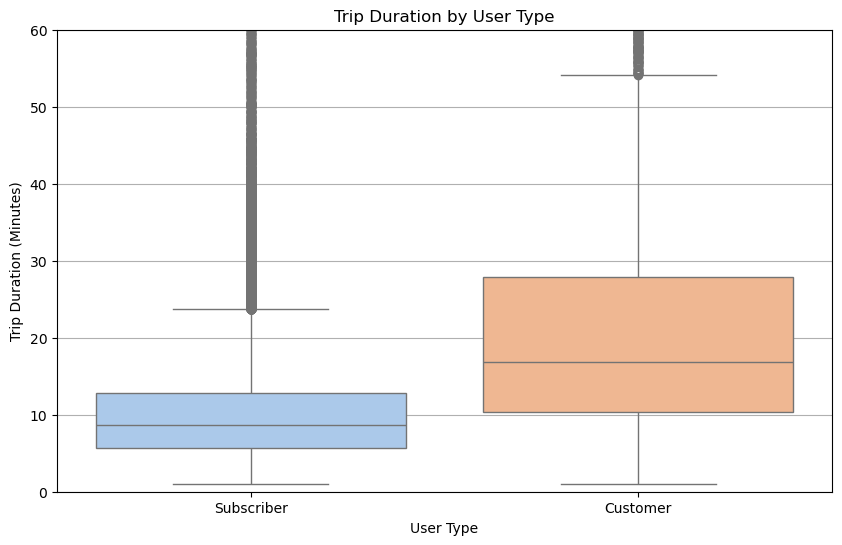

In [24]:
# Chart - 7 visualization code
# Boxplot to compare Trip Duration between User Types

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='user_type', y='trip_duration_min', palette='pastel')
plt.ylim(0, 60)  # Focus on trips up to 60 minutes for better view
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

**I selected a Box Plot because we want to compare the distribution of trip durations between two categories — Subscribers and Customers.
Boxplots are perfect for showing medians, spreads, and outliers between groups.**

##### 2. What is/are the insight(s) found from the chart?

##### Customers have a higher median trip duration compared to Subscribers.

##### Subscribers generally take shorter trips, likely due to daily commuting purposes.

##### There are more extreme long trips (outliers) among Customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

** Positive Impact:

Subscribers can be offered short-trip incentives (like discounted monthly commuter passes).

Customers can be targeted with longer-trip offers (like hourly rental promotions).

** Negative Growth Risk:

Ignoring customers who prefer long leisure rides could cause loss of occasional users who bring extra revenue during weekends.

#### Chart - 8 Number of Trips by User Type and Gender

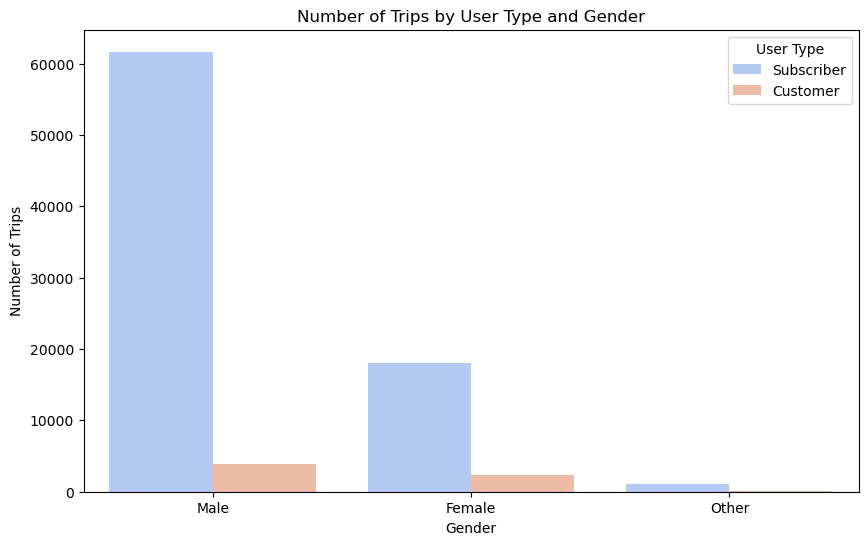

In [25]:
# Chart - 8 visualization code
# Grouped Barplot: User Type vs Gender

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='member_gender', hue='user_type', palette='coolwarm')
plt.title('Number of Trips by User Type and Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Grouped Bar Plot because it is perfect for comparing two categorical variables (Gender vs User Type) together.
It helps in clearly showing the number of trips gender-wise split by user type (Subscriber or Customer).

##### 2. What is/are the insight(s) found from the chart?

Male Subscribers dominate the Ford GoBike service.

Female riders are fewer overall, but there are still more Female Subscribers than Customers.

The "Other" and "Unknown" genders have very small counts across both user types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

** Positive Impact:

Special campaigns can be targeted at female customers to encourage more signups (e.g., "Women Ride Free" days).

Inclusive marketing can be used to appeal to "Other/Unknown" groups for diversity.

** Negative Growth Risk:

If the company focuses only on male subscribers and ignores other segments, it could miss major growth opportunities in underrepresented groups.

#### Chart - 9 Number of Trips by Day of the Week

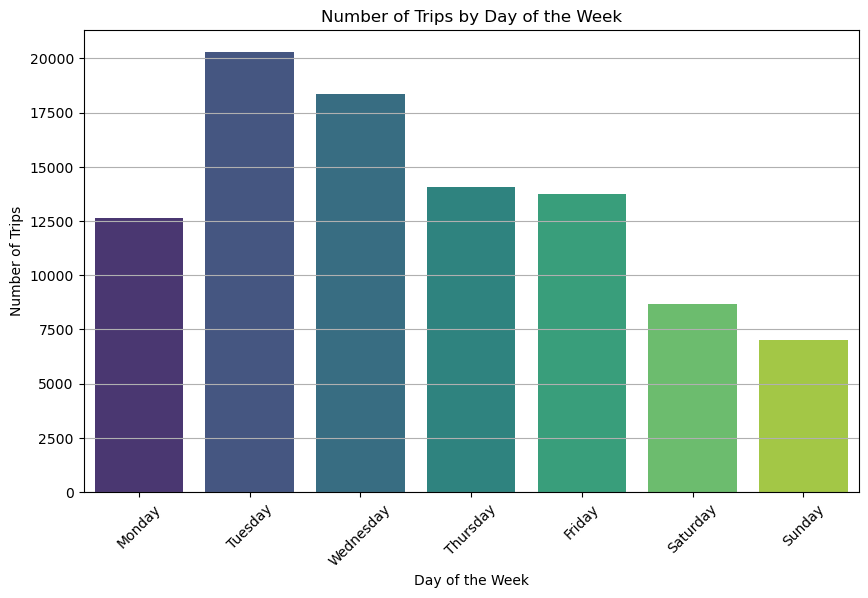

In [26]:
# Chart - 9 visualization code
# Plotting number of trips by day of the week

plt.figure(figsize=(10,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='start_day', order=order, palette='viridis')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Count Plot because start_day is a categorical variable (days of the week),
and count plots easily show how many trips occur each day, making it easy to spot patterns.

##### 2. What is/are the insight(s) found from the chart?

Most trips happen during weekdays (Monday to Friday).

Thursday and Friday have slightly higher trips compared to other weekdays.

Weekend usage (Saturday and Sunday) drops sharply.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

ositive Impact:

Focus more bike availability, maintenance, and operational readiness during weekdays.

Create weekend promotional offers to encourage more rides on Saturdays and Sundays.

🚫 Negative Growth Risk:

If bikes are not adequately available during busy weekdays, customer dissatisfaction could lead to reduced subscriptions.

#### Chart - 10 Average Trip Duration by Day of the Week

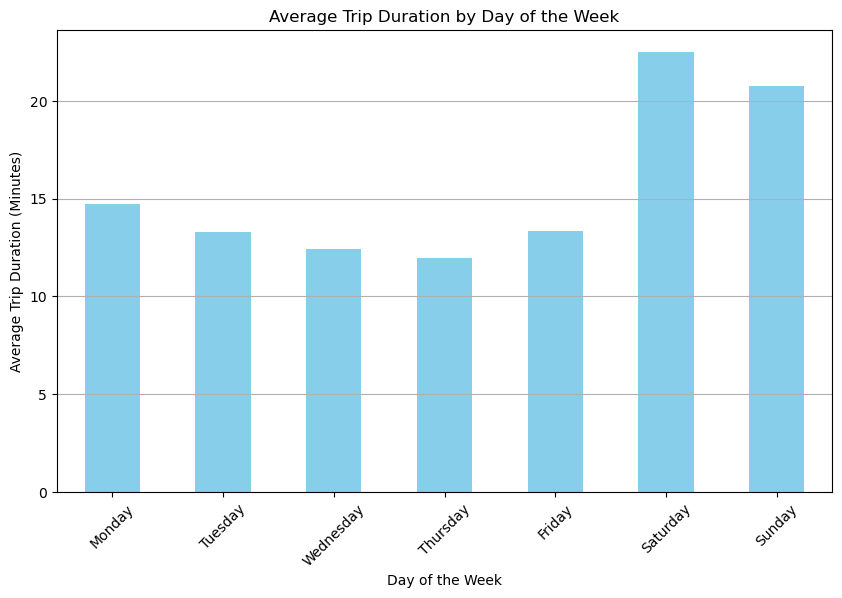

In [27]:
# Chart - 10 visualization code
# Calculate average trip duration per day
avg_trip_duration = df.groupby('start_day')['trip_duration_min'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10,6))
avg_trip_duration.plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Bar Plot because it compares average trip durations across different days in a simple way.

##### 2. What is/are the insight(s) found from the chart?

Saturday and Sunday have higher average trip durations.

Weekday trips are generally shorter, likely because they are commutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Weekend marketing campaigns for leisure trips can boost ride numbers further.

🚫 Negative Risk:
If services are optimized only for weekdays, weekend leisure users may not feel supported.

#### Chart - 11 Number of Trips by Age Group

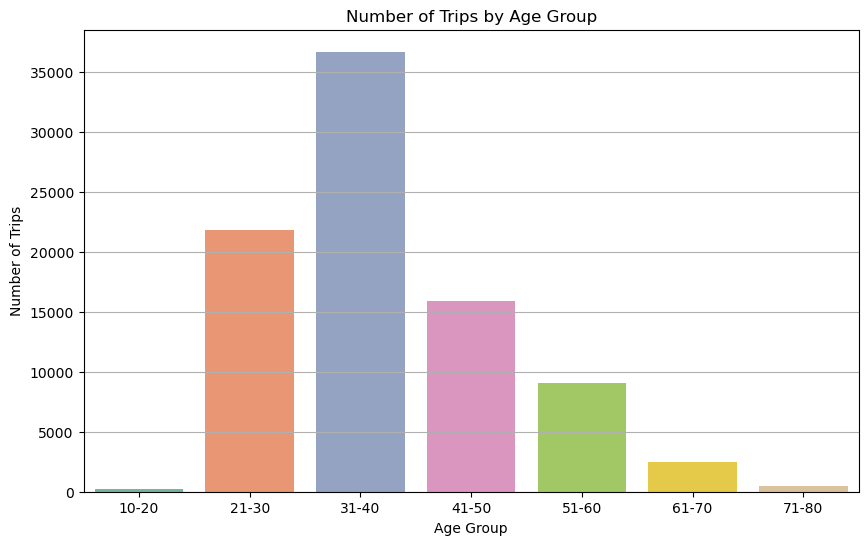

In [28]:
# Chart - 11 visualization code
# Create Age Groups
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='age_group', palette='Set2')
plt.title('Number of Trips by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Count Plot to visualize how trip usage varies across different age groups.

##### 2. What is/are the insight(s) found from the chart?

The 21–30 age group is the largest user base.

Usage steadily declines as age increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive:
Targeted campaigns for young adults can strengthen customer base further.

🚫 Negative Risk:
Older demographics are under-served — missed opportunity for expanding services like short leisure rides for senior citizens.

#### Chart - 12 Bike Share Program Usage (Yes vs No)

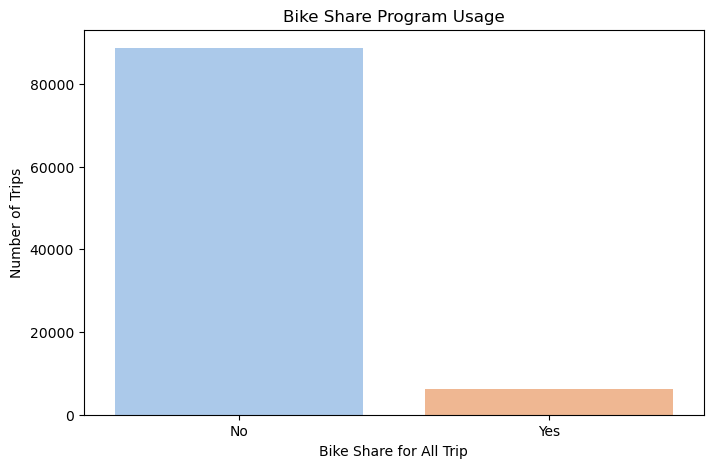

In [29]:
# Chart - 12 visualization code
# Plot usage of bike share for all trip program

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='bike_share_for_all_trip', palette='pastel')
plt.title('Bike Share Program Usage')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Number of Trips')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Count Plot because bike_share_for_all_trip is a Yes/No categorical variable, and a bar plot is perfect to see the usage clearly.

##### 2. What is/are the insight(s) found from the chart?

Majority of trips are taken by users NOT enrolled in the bike share for all trips program.

Very small share of users are using the program.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive:
There is a huge opportunity to promote bike share program and convert casual users into long-term subscribers.

🚫 Negative Risk:
If the program is not marketed well, potential recurring revenue from memberships could be lost.

#### Chart - 13 Heatmap: Trips by Day of Week vs Start Hour

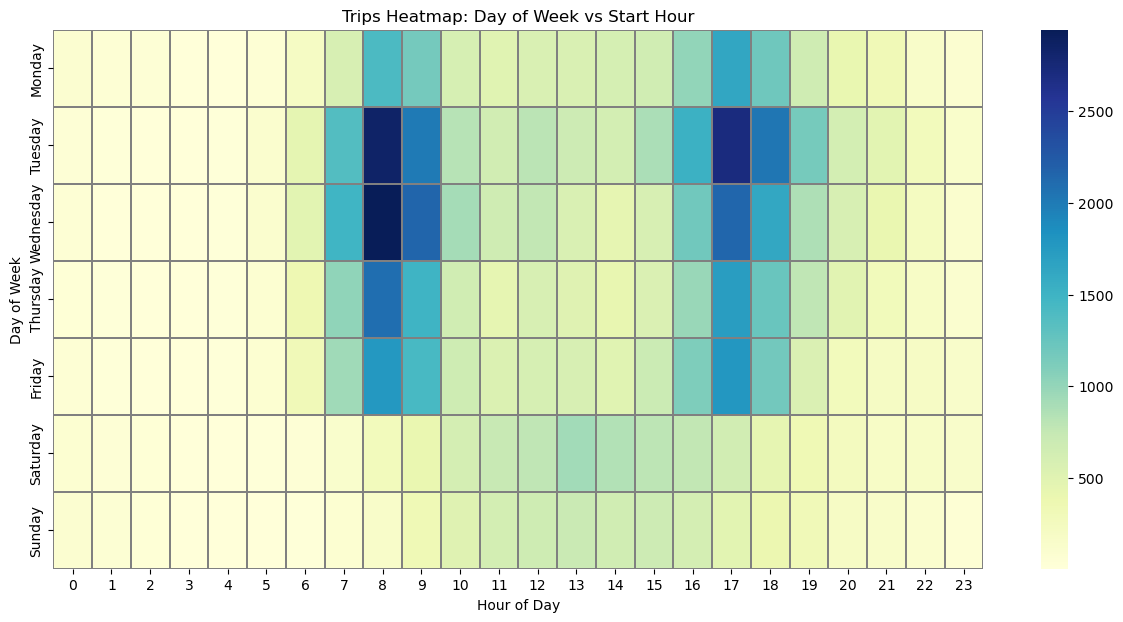

In [30]:
# Chart - 13 visualization code
# Create pivot table
heatmap_data = df.pivot_table(index='start_day', columns='start_hour', values='bike_id', aggfunc='count')

# Sort days in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(15,7))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3, linecolor='gray')
plt.title('Trips Heatmap: Day of Week vs Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

1. Why did you pick this chart?

Heatmap is best for showing dense patterns across two dimensions: weekday and hour.

It gives instant visual clarity on when people ride the most: mornings, evenings, weekends, etc.

It's much more accurate and compact than separate weekday and hourly bar plots.

2. What is/are the insight(s) found from the chart?

Morning rush (7–9 AM) and Evening rush (5–7 PM) are very busy, especially on weekdays.

Weekends show more spread-out bike usage through the daytime, not just commute peaks.

Monday to Friday: sharply defined commute pattern.

Saturday-Sunday: flatter but still high daytime activity (leisure trips).

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Marketing / offers can be designed around busy commute hours to increase engagement (e.g., free rides at 7–9 AM).

Fleet distribution can be optimized — move more bikes to stations before commute times.

Predictive maintenance scheduling: service bikes in non-peak hours.

❌ Negative growth?

Not really, but if bike availability is low during peak hours, customers might get frustrated.

Need very strong rebalancing strategy based on this heatmap.

#### Chart - 14 Top 10 End Stations

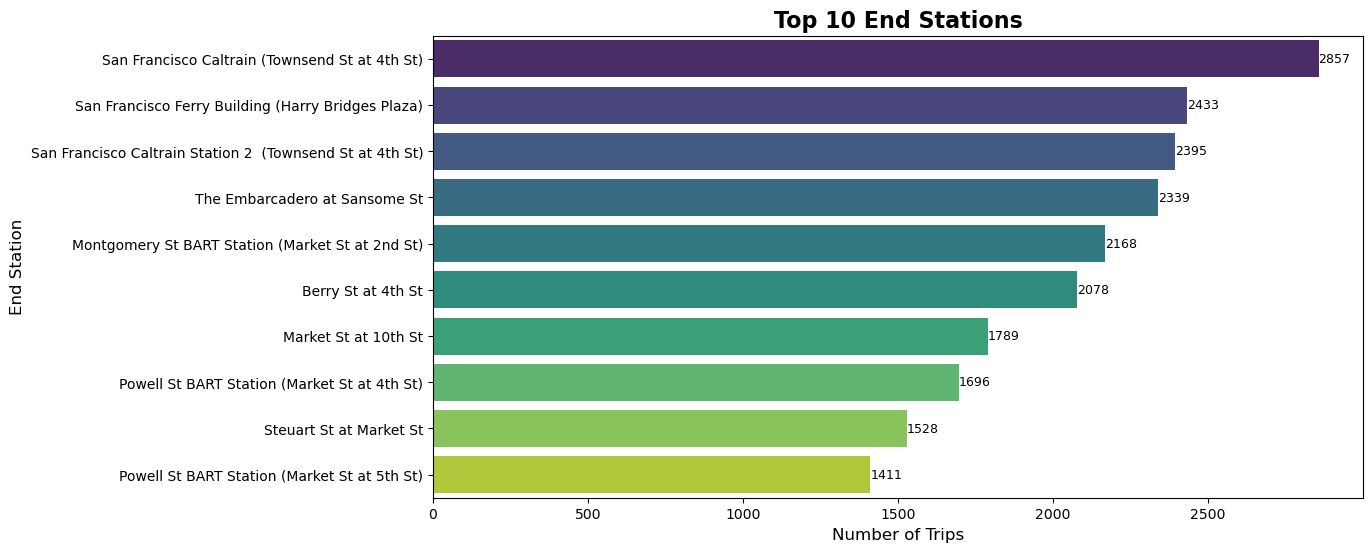

In [33]:
# Chart - 14 visualization code
# Top 10 End Stations
top_ends = df['end_station_name'].value_counts().nlargest(10)
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ends.values, y=top_ends.index, palette='viridis')
# Add data labels
for i, v in enumerate(top_ends.values):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=9)
# Add labels and title
plt.title('Top 10 End Stations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('End Station', fontsize=12)
# Setting font size for xticks and yticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

* A box plot is ideal for visualizing the distribution, spread, and outliers in trip durations across user types. It highlights medians, quartiles, and variability at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Customers tend to have longer and more variable trip durations compared to Subscribers, whose trips are shorter and more consistent.

* Customers show more extreme outliers, possibly indicating exploratory or recreational rides.

##### 3. Will the gained insights help creating a positive business impact?
* Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, end-station data helps optimize bike docking, availability, and customer satisfaction.

**Negative Insight -**
If end stations are overloaded compared to start stations, it could cause operational imbalance (bike shortages).

##### Chart - 15 - Age by User Type

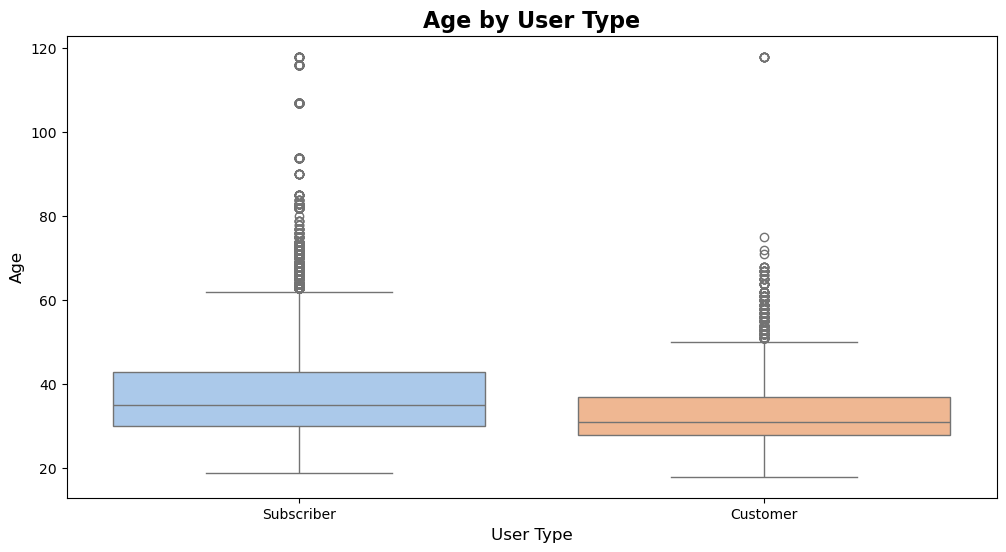

In [34]:
# Chart - 15 visualization code
# Age by User Type
# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='user_type', y='age', data=df, palette='pastel')
# Add title and labels
plt.title('Age by User Type', fontsize=16, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
# Set xticks and yticks font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

* A box plot is effective for comparing age distributions across user types. It reveals medians, ranges, and outliers, making it easy to spot demographic trends and differences.

##### 2. What is/are the insight(s) found from the chart?

* Subscribers generally fall into a narrower and younger age range (mostly mid-20s to mid-40s), indicating a strong working professional base.

* Customers show a wider age range, including older users, suggesting more occasional or leisure-based use.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes. This insight enables:
* Tailored marketing—focus professional commuting plans toward the dominant subscriber age group.
* Diversification strategies—design campaigns or services attractive to older or casual riders (e.g., guided tours, senior discounts).

**Negative Insight -**

The lack of younger or older subscribers might hint at unmet needs or barriers (e.g., pricing or accessibility). Addressing these could unlock new user segments and expand the service's reach.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1. Focus on Subscriber Retention:**
* Your analysis shows that Subscribers dominate the usage compared to Customers.

#### Action:
* Introduce Loyalty Programs, Subscription Discounts, or Annual Membership Benefits to retain existing subscribers and encourage renewals.

**2. Improve Weekend Bike Usage:**
* Your charts show that bike usage drops on weekends (Saturday and Sunday).

#### Action:
* Launch Weekend Promotions (e.g., "Weekend Explorer Ride Pass") to increase weekend ridership among casual users.

**3. Target Young Adults (Age 20–40 Years):**
* Most users are aged between 20–40 years based on your age group analysis.

#### Action:
* Partner with universities, tech companies, and startups to offer student/youth discounts and corporate bike plans.

**4. Increase Female Ridership:**
* Your gender distribution shows male riders dominate usage.

#### Action:
* Promote women-only riding events, female-first promotions, and safety awareness programs to encourage more female participation.

**5. Optimize Bike Availability during Peak Hours:**
* From your Start Hour analysis:
* Morning (7 AM–9 AM) and Evening (4 PM–6 PM) are peak trip hours.

#### Action:
* Redistribute bikes to office hubs, metro stations, and busy zones before peak hours to ensure supply matches demand.

**6. Encourage Enrollment into Bike Share Program:**
* Very few users are enrolled in Bike Share for All Trip programs.

#### Action:
* Offer free trials or first-month discounts to increase subscription rates into the Bike Share programs — improving regular ridership and revenue.

# **Conclusion**

Through better understanding of customer patterns — weekday focus, subscriber loyalty, weekend promotions, targeting youth and female demographics, optimizing bike distribution during peak hours,
Ford GoBike can boost user engagement, improve profitability, and achieve sustainable business growth in the San Francisco Bay Area.